<a href="https://colab.research.google.com/github/Ebipademp/nbte_directory/blob/main/Python_makeupProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Foundations Project: Austo

**Marks: 60**

## Problem Statement

### Context

In the 21st century, cars are an important mode of transportation that provides us the opportunity for personal control and autonomy. In day-to-day life, people use cars for commuting to work, shopping, visiting family and friends, etc. Research shows that more than 76% of people prevent themselves from traveling somewhere if they don't have a car. Most people tend to buy different types of cars based on their day-to-day necessities and preferences. So, it is essential for automobile companies to analyze the preference of their customers before launching a car model into the market. Austo, a UK-based automobile company aspires to grow its business into the US market after successfully establishing its footprints in the European market.

In order to be familiar with the types of cars preferred by the customers and factors influencing the car purchase behavior in the US market, Austo has contracted a consulting firm. Based on various market surveys, the consulting firm has created a dataset of 3 major types of cars that are extensively used across the US market. They have collected various details of the car owners which can be analyzed to understand the automobile market of the US.

### Objective

Austo's management team wants to understand the demand of the buyers and trends in the US market. They want to build customer profiles based on the analysis to identify new purchase opportunities so that they can manipulate the business strategy and production to meet certain demand levels. Further, the analysis will be a good way for management to understand the dynamics of a new market. Suppose you are a Data Scientist working at the consulting firm that has been contracted by Austo. You are given the task to create buyer's profiles for different types of cars with the available data as well as a set of recommendations for Austo. Perform the data analysis to generate useful insights that will help the automobile company to grow its business.

### Data Description

austo_automobile.csv: The dataset contains buyer's data corresponding to different types of products(cars).

### Data Dictionary

* Age: Age of the customer
* Gender: Gender of the customer
* Profession: Indicates whether the customer is a salaried or business person
* Marital_status: Marital status of the customer
* Education: Refers to the highest level of education completed by the customer
* No_of_dependents: Number of dependents(partner/children/spouse) of the customer
* Personal_loan: Indicates whether the customer availed a personal loan or not
* House_loan: Indicates whether the customer availed house loan or not
* Partner_working: Indicates whether the customer's partner is working or not
* Salary: Annual Salary of the customer
* Partner_salary: Annual Salary of the customer's partner
* Total_salary: Annual household income (Salary + Partner_salary) of the customer's family
* Price: Price of the car
* Make: Car type (Hatchback/Sedan/SUV)

## Importing necessary libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
import scipy.stats
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Overview

#### Question 1: How many rows and columns are present in the data? [0.5 mark]

In [2]:
# read the data
df = "/content/drive/MyDrive/Colab Notebooks/Python_makeupProject/austo_automobile.csv"
df = pd.read_csv(df)
# returns the first 5 rows
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,24,Male,Salaried,Married,Post Graduate,4,No,Yes,Yes,52000,25000,77000,18000,Hatchback
1,28,Male,Salaried,Married,Post Graduate,3,No,Yes,No,68000,0,68000,18000,Hatchback
2,23,Male,Salaried,Married,Graduate,4,Yes,Yes,No,31000,0,31000,18000,Hatchback
3,26,Male,Business,Married,Post Graduate,4,Yes,Yes,Yes,66000,35000,101000,18000,Hatchback
4,28,Male,Business,Married,Post Graduate,4,Yes,No,No,64000,0,64000,18000,Hatchback


In [ ]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,28,Male,Salaried,Married,Post Graduate,2,Yes,No,No,72000,0,72000,33000,Hatchback
1577,23,Male,Salaried,Single,Graduate,2,Yes,Yes,No,37000,0,37000,33000,Hatchback
1578,23,Male,Business,Married,Graduate,4,Yes,Yes,Yes,38000,28000,66000,33000,Hatchback
1579,25,Male,Business,Married,Post Graduate,3,Yes,Yes,Yes,58000,40000,98000,33000,Hatchback
1580,28,Male,Salaried,Married,Graduate,4,No,Yes,Yes,54000,40000,94000,33000,Hatchback


In [ ]:
df.shape

(1581, 14)

Answer (1)
There are 1581rows and 14columns

#### Question 2: What are the datatypes of the different columns in the dataset? [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1581 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   int64 
 6   Personal_loan     1581 non-null   object
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   int64 
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.0+ KB


#### Observations:
The dataset has integer data-type are 6, categore or object data-type are 8 giving a total of 14. These represent the 14columns

#### Question 3: Check the statistical summary of the data. What is the minimu, avergae, and maximum Price of the cars? [2 marks]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,32.211259,9.125477,22.0,25.0,29.0,38.0,60.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,59732.447818,14278.642665,30000.0,51000.0,59000.0,71000.0,90000.0
Partner_salary,1581.0,19720.430108,19480.214404,0.0,0.0,25000.0,38000.0,80000.0
Total_salary,1581.0,79452.877925,24855.936043,30000.0,61000.0,78000.0,96000.0,158000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


#### Observations:
From the data presented above it is observed that the minimum price for the cars is 18,000.00, the average is 35,597.72 and the maximum is 70,000.00



#### Question 4: Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [ ]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

#### Observations:


#From the above output it is observed that there is no missing value in all the variables

#### Question 5: How many cars are there of type SUV? [1 mark]

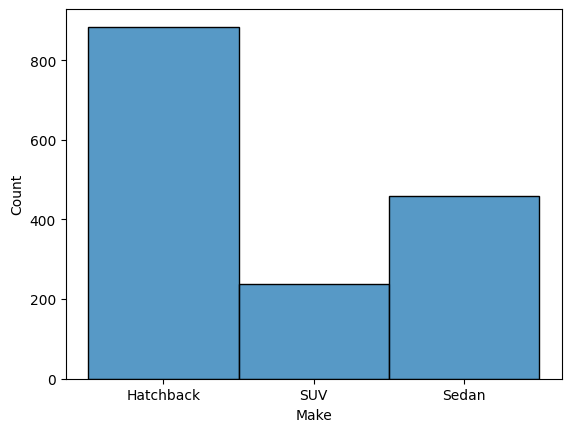

In [ ]:
sns.histplot(data=df, x='Make')
plt.show()


#### Observations:

From the plot here it can be deduced that there are over 200 SUV

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [10 marks]

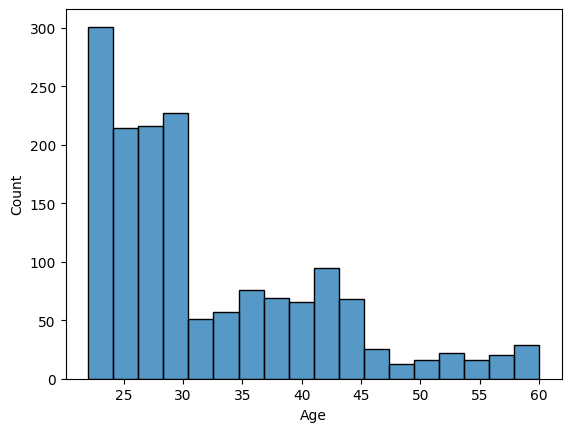

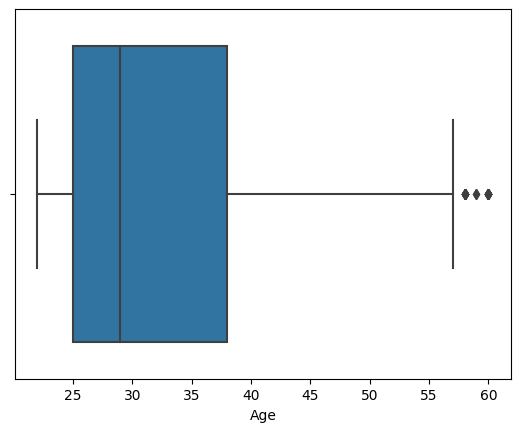

In [ ]:
sns.histplot(data=df, x='Age')
plt.show()
sns.boxplot(data=df, x='Age')
plt.show()

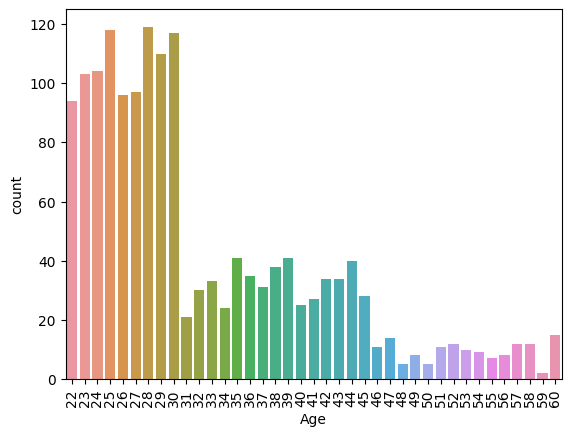

In [ ]:
df['Age'].value_counts();
sns.countplot(data=df, x='Age');
plt.xticks(rotation=90)
plt.show()

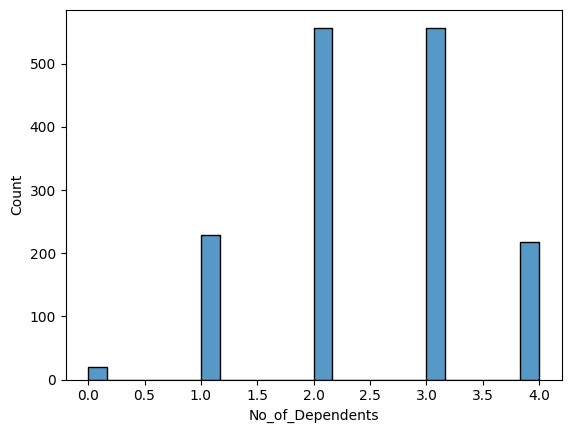

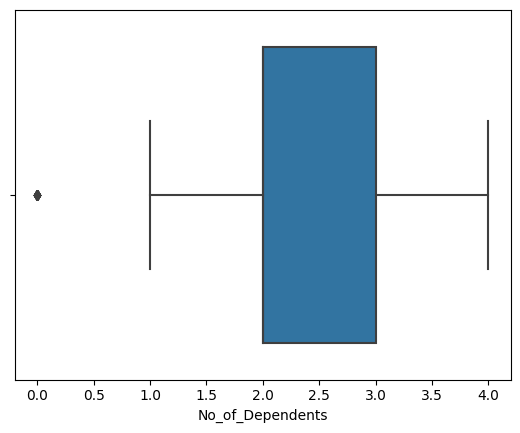

In [ ]:
sns.histplot(data=df, x='No_of_Dependents')
plt.show()
sns.boxplot(data=df, x='No_of_Dependents')
plt.show()

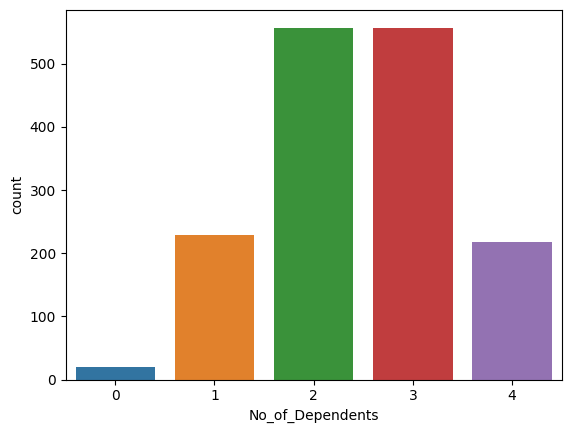

In [ ]:
df['No_of_Dependents'].value_counts();
sns.countplot(data=df, x='No_of_Dependents');

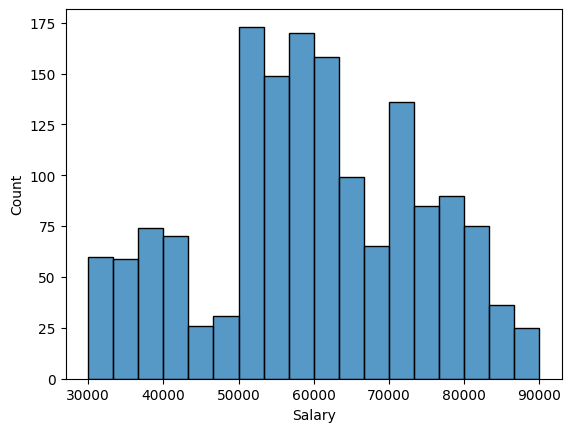

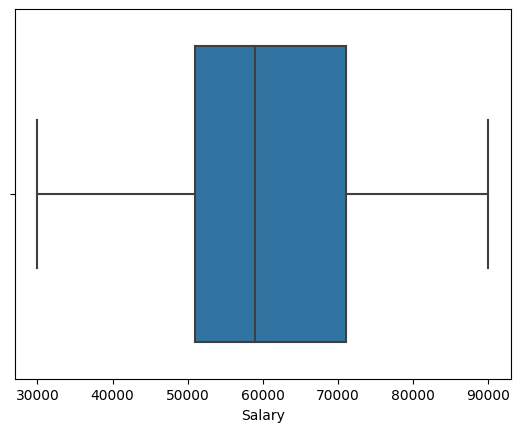

In [ ]:
sns.histplot(data=df, x='Salary')
plt.show()
sns.boxplot(data=df, x='Salary')
plt.show()

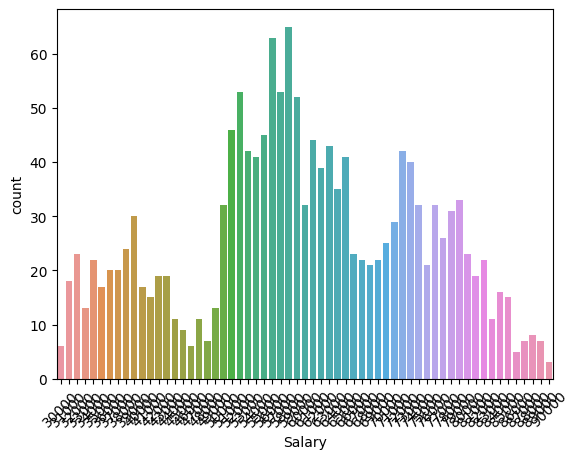

In [ ]:
df['Salary'].value_counts();
sns.countplot(data=df, x='Salary');
plt.xticks(rotation=45)
plt.show()

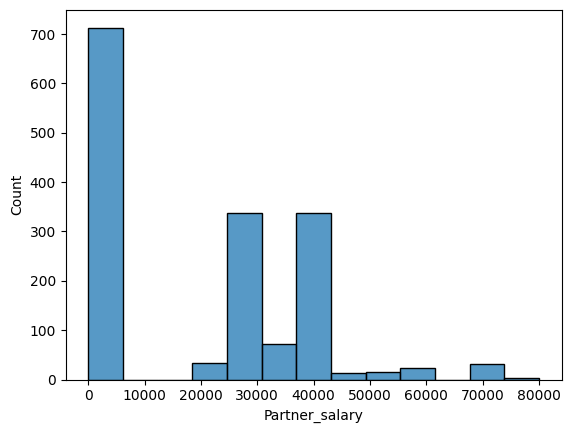

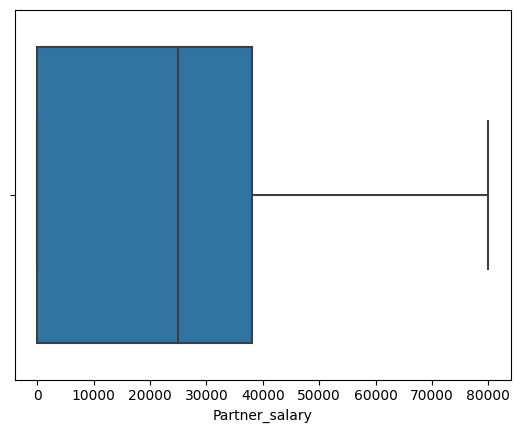

In [ ]:
sns.histplot(data=df, x='Partner_salary')
plt.show()
sns.boxplot(data=df, x='Partner_salary')
plt.show()

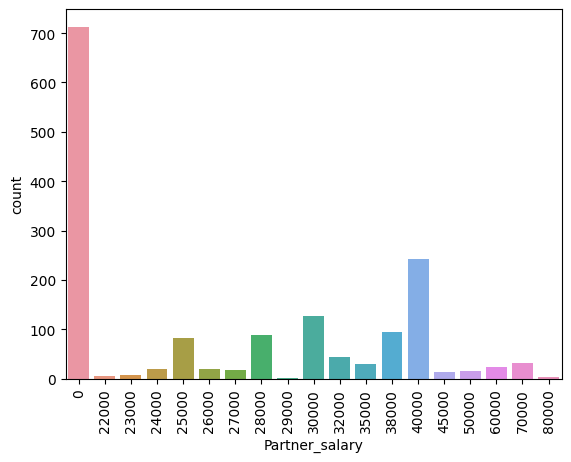

In [ ]:
df['Partner_salary'].value_counts();
sns.countplot(data=df, x='Partner_salary');
plt.xticks(rotation=90)
plt.show()

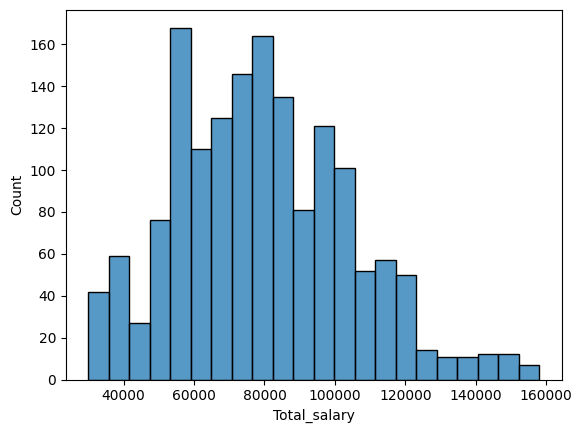

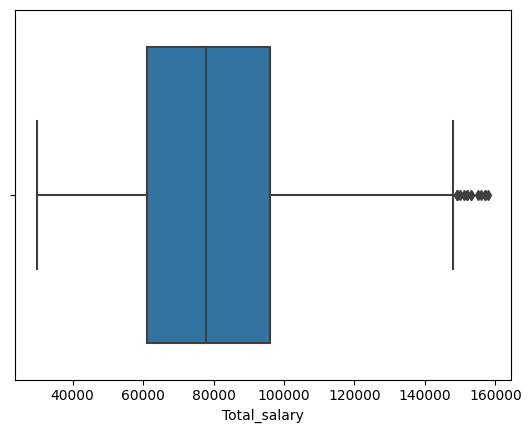

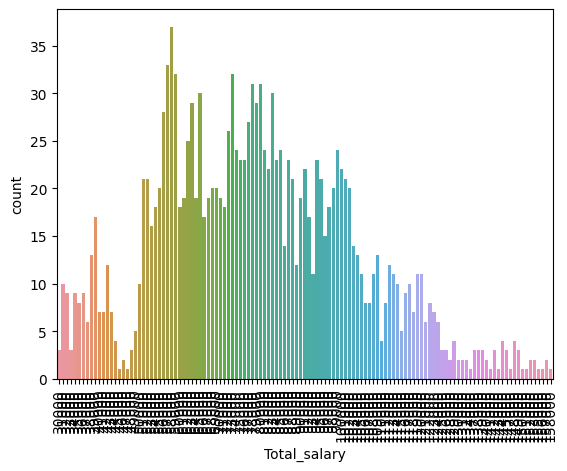

In [ ]:
sns.histplot(data=df, x='Total_salary')
plt.show()
sns.boxplot(data=df, x='Total_salary')
plt.show()

df['Total_salary'].value_counts();
sns.countplot(data=df, x='Total_salary');
plt.xticks(rotation=90)
plt.show()

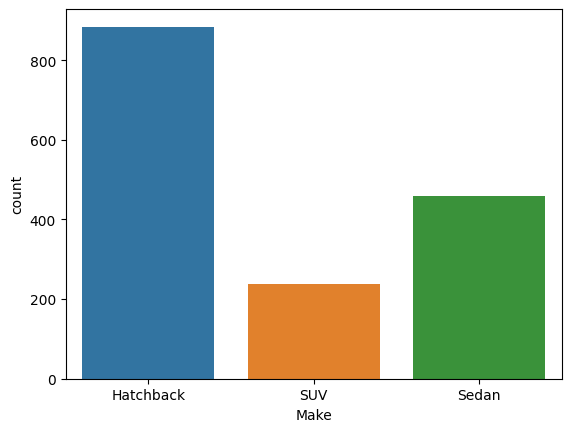

In [ ]:
df['Make'].value_counts();
sns.countplot(data=df, x='Make');

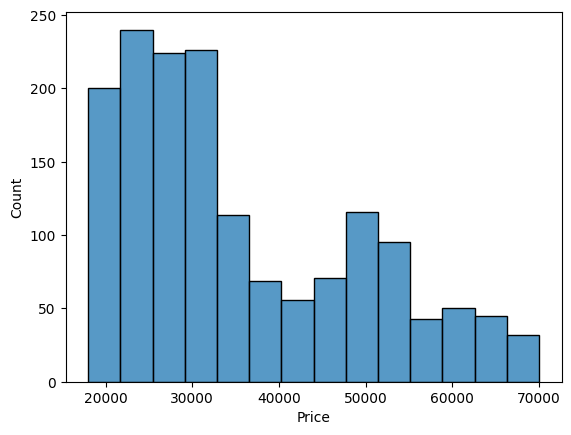

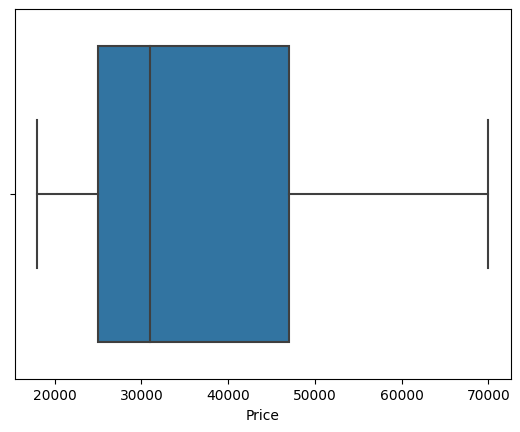

In [ ]:
sns.histplot(data=df, x='Price')
plt.show()
sns.boxplot(data=df, x='Price')
plt.show()

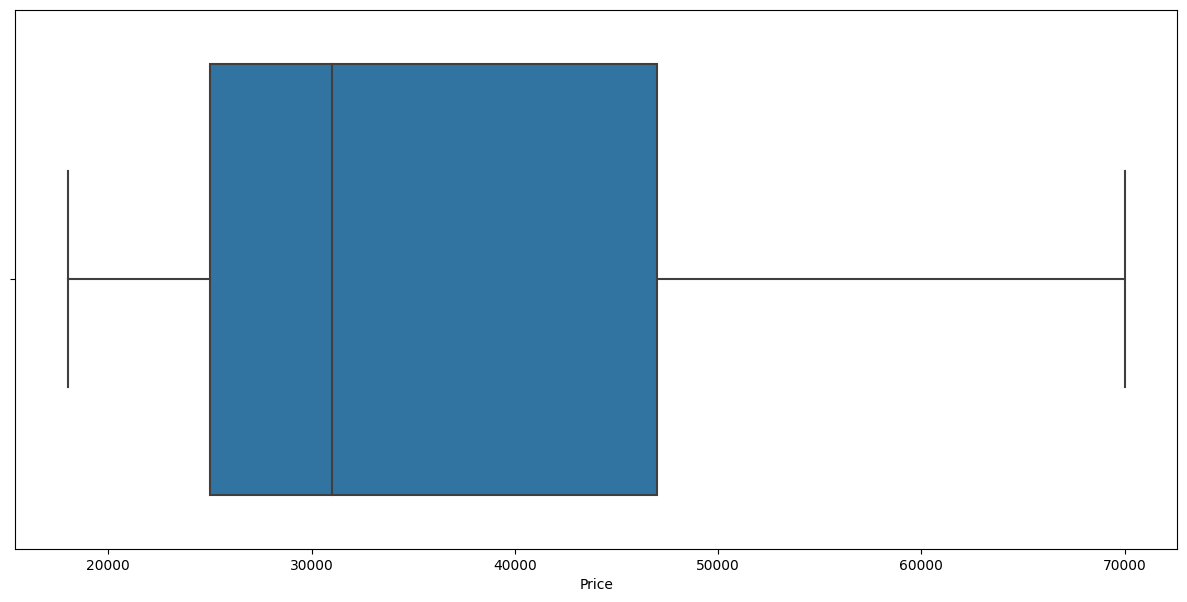

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='Price');

It can be observed that there is no outliers in this variable "Price" and the mean price is about 30,000

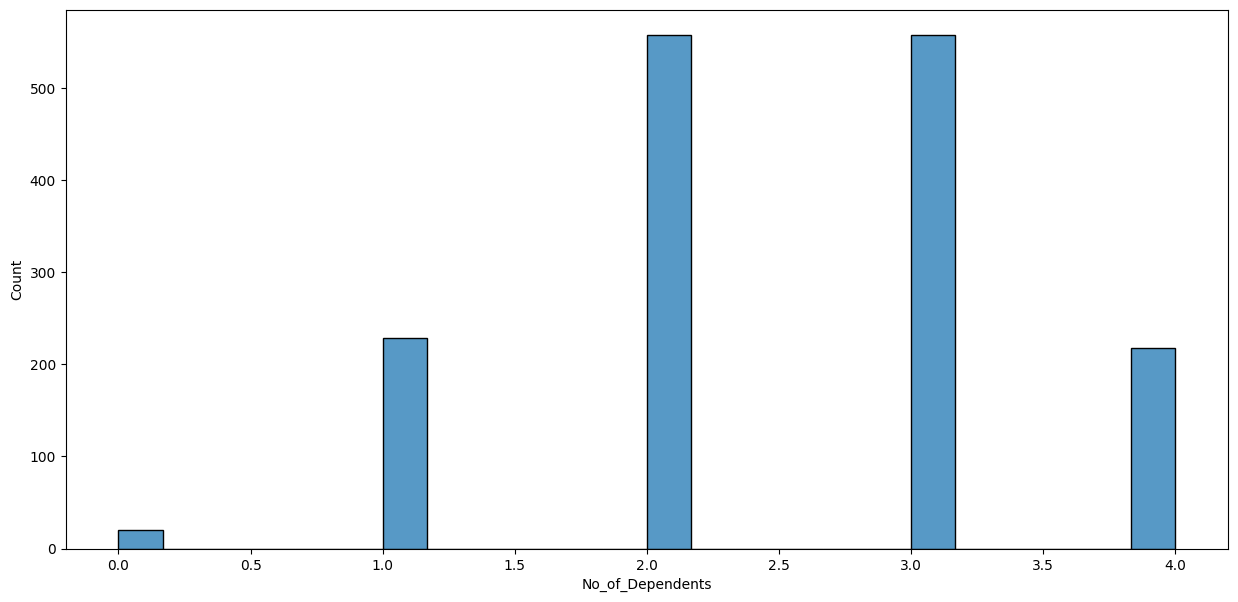

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(data=df, x='No_of_Dependents');

#### Observations:

#### Question 7: How many cars are of make Hatchback and priced above 25000. State your observations? [2 marks]

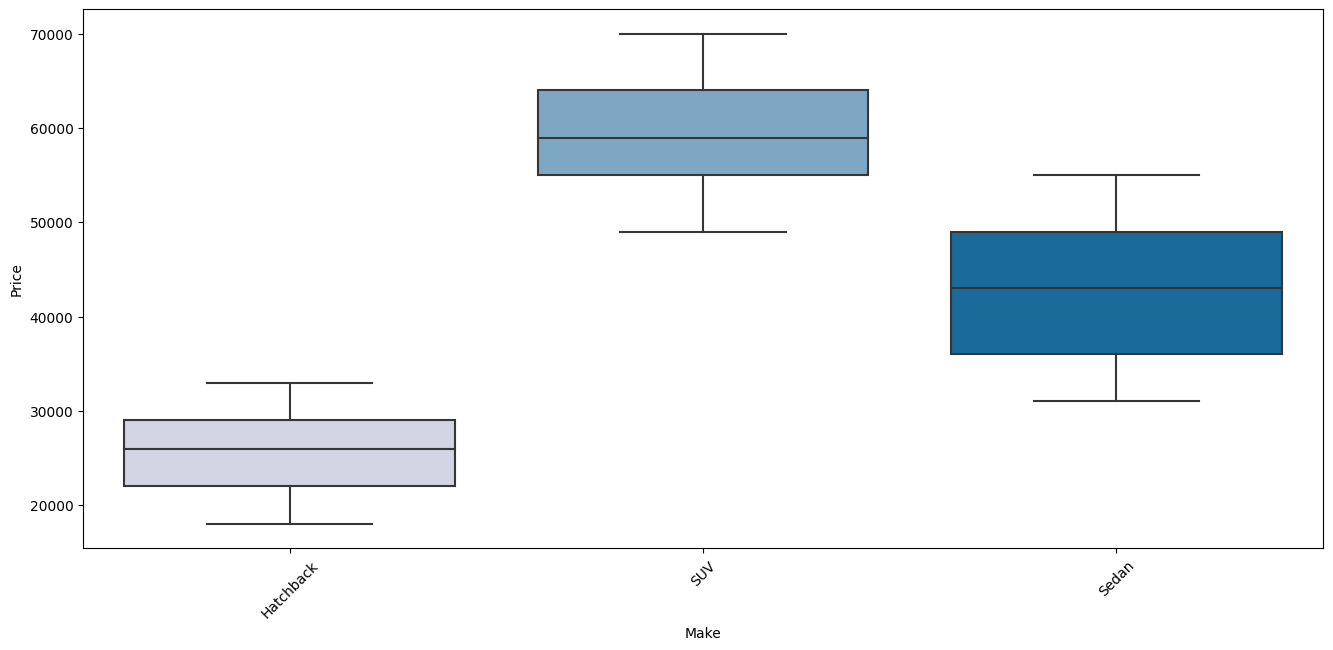

In [ ]:
plt.figure(figsize=(16,7))
sns.boxplot(y='Price', x='Make', data=df, palette='PuBu')
plt.xticks(rotation=45)
plt.show()

#### Observations:

#### Question 8: How many owners have bought cars that were priced higher than their salary. How many of them have taken personal loan? [3 marks]

In [5]:
df_car_above_Tsalary=df[df['Total_salary']<df['Price']].count()
df_car_above_Tsalary

Age                 41
Gender              41
Profession          41
Marital_status      41
Education           41
No_of_Dependents    41
Personal_loan       41
House_loan          41
Partner_working     41
Salary              41
Partner_salary      41
Total_salary        41
Price               41
Make                41
dtype: int64

In [18]:
df_car_above_salary=df[df['Salary']<df['Price']].count()
df_car_above_salary

Age                 96
Gender              96
Profession          96
Marital_status      96
Education           96
No_of_Dependents    96
Personal_loan       96
House_loan          96
Partner_working     96
Salary              96
Partner_salary      96
Total_salary        96
Price               96
Make                96
dtype: int64

# There are 96 persons in the dataset whose salay is less than car make they own

## 41 persons out of the 96 persons depend on their partner's income or loan to own the car of their chioce

In [16]:
df_loan = df['Personal_loan']
df_loan

0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
1576    Yes
1577    Yes
1578    Yes
1579    Yes
1580     No
Name: Personal_loan, Length: 1581, dtype: object

In [ ]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,24,Male,Salaried,Married,Post Graduate,4,No,Yes,Yes,52000,25000,77000,18000,Hatchback
1,28,Male,Salaried,Married,Post Graduate,3,No,Yes,No,68000,0,68000,18000,Hatchback
2,23,Male,Salaried,Married,Graduate,4,Yes,Yes,No,31000,0,31000,18000,Hatchback
3,26,Male,Business,Married,Post Graduate,4,Yes,Yes,Yes,66000,35000,101000,18000,Hatchback
4,28,Male,Business,Married,Post Graduate,4,Yes,No,No,64000,0,64000,18000,Hatchback


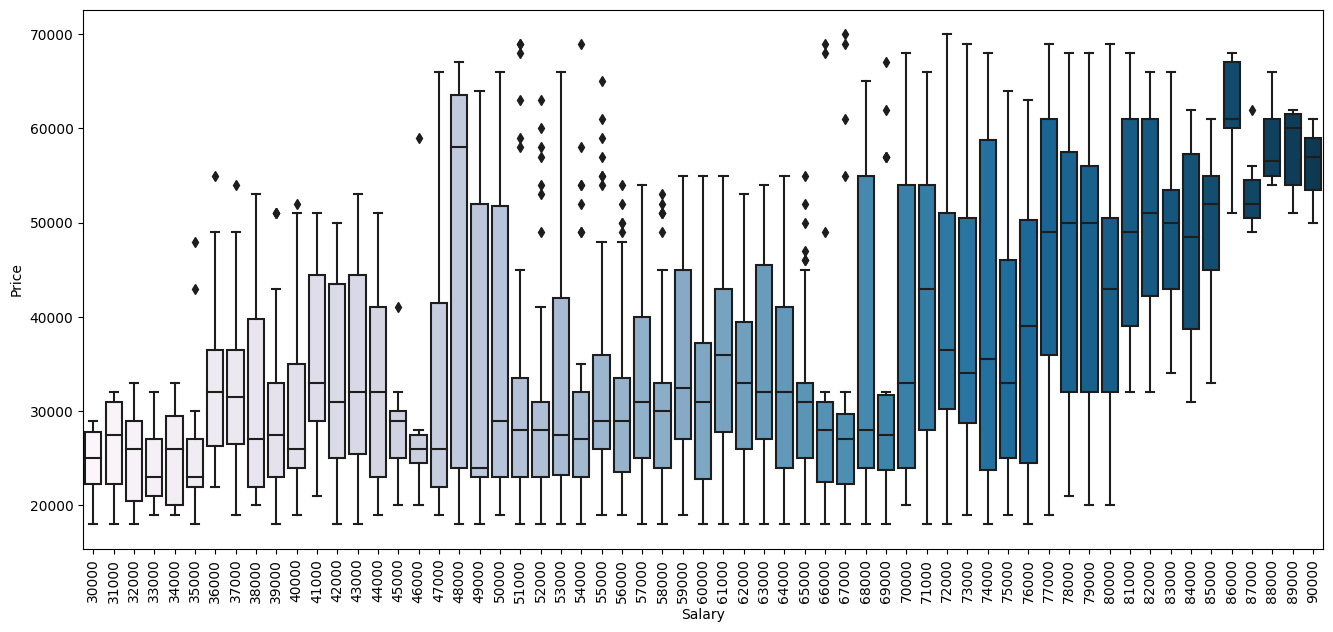

In [ ]:
plt.figure(figsize=(16,7))
sns.boxplot(y='Price', x='Salary', data=df, palette='PuBu')
plt.xticks(rotation=90)
plt.show()

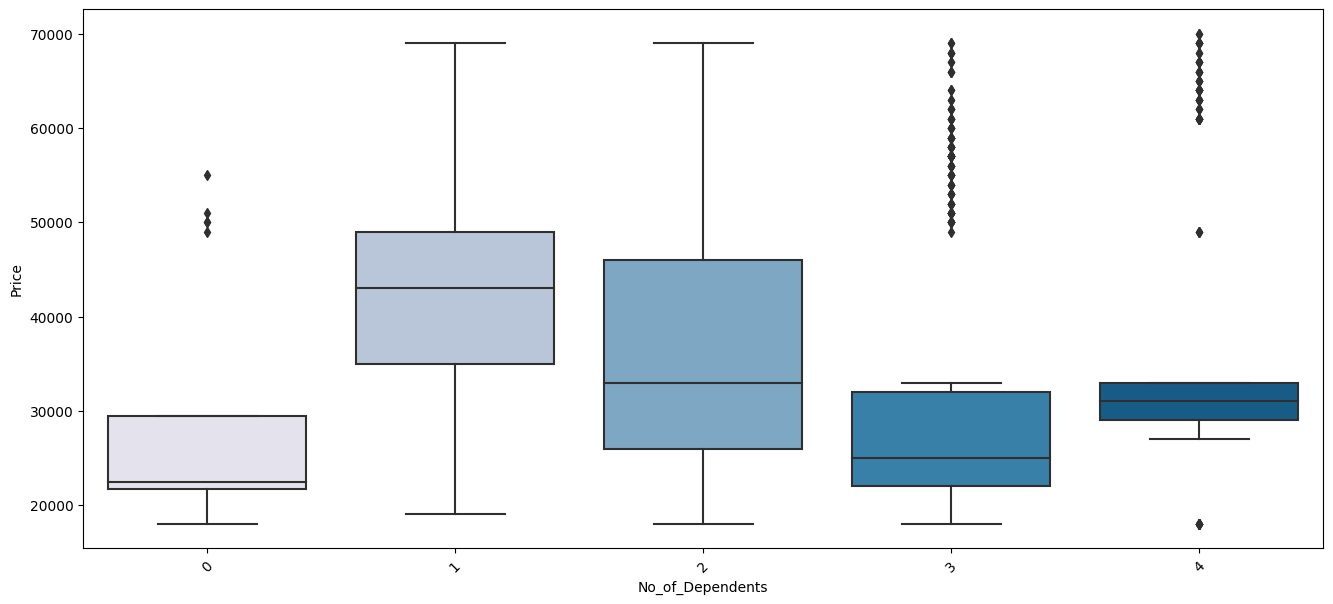

In [ ]:
plt.figure(figsize=(16,7))
sns.boxplot(y='Price', x='No_of_Dependents', data=df, palette='PuBu')
plt.xticks(rotation=45)
plt.show()

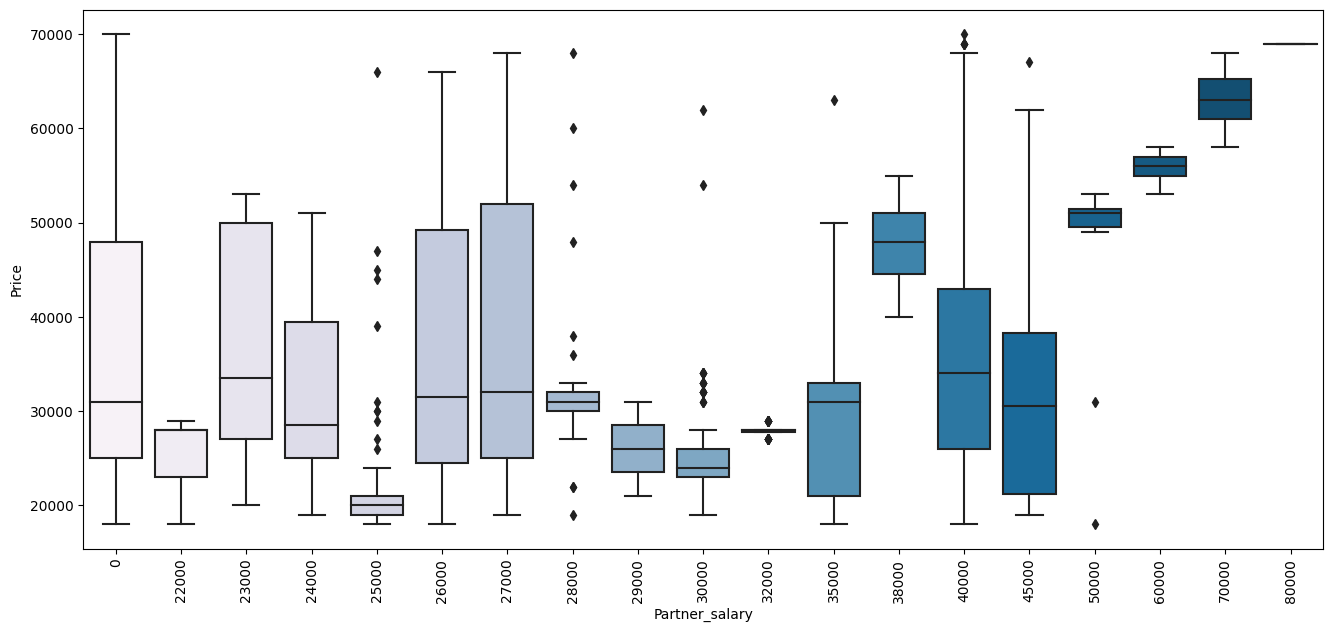

In [ ]:
plt.figure(figsize=(16,7))
sns.boxplot(y='Price', x='Partner_salary', data=df, palette='PuBu')
plt.xticks(rotation=90)
plt.show()

#### Observations:


### Multivariate Analysis

#### Question 9: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [15 marks]

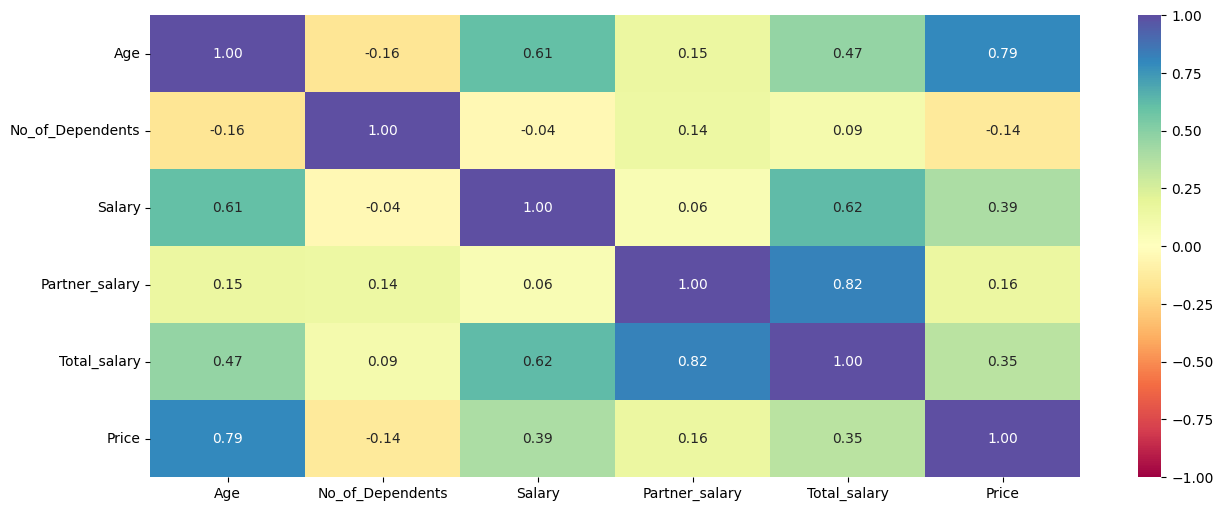

In [6]:
num_var=['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']
corr=df[num_var].corr()

# Plot the Heatmap

plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='Spectral')
plt.show()

In [10]:
for i,variable in enumerate(num_var):
  print(i,variable)

0 Age
1 No_of_Dependents
2 Salary
3 Partner_salary
4 Total_salary
5 Price


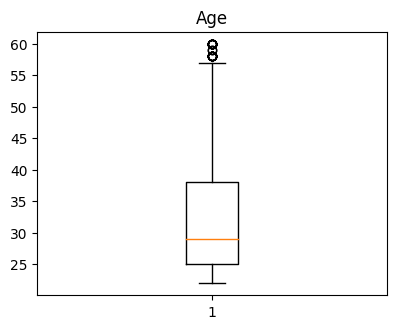

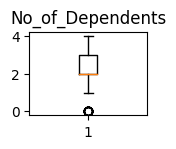

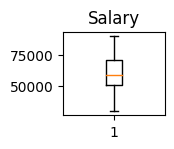

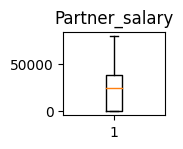

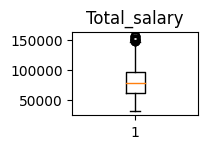

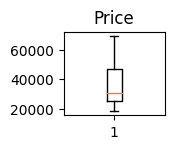

In [12]:
# Checking the dateset for outliers
plt.figure(figsize=(15,12))
for i, variable in enumerate (num_var):
  plt.subplot(4, 4, i+1)
  plt.boxplot(df[variable], whis=1.5)
  plt.tight_layout()
  plt.title(variable)
  plt.show()

#### Observations:


#### Question 10:For customers who have 3 or fewer dependents, how does the average car price vary by profession ? [2 marks]

# Line graph plot

In [18]:
prof=df.Profession.unique().tolist()
prof

['Salaried', 'Business']

In [19]:
prof=df.Profession.unique().tolist()
prof
df.Profession = pd.Categorical(df.Profession, ordered=True, categorises = prof)
plt.lineplot(data=df, x="Profession", y="Price", ci=False, color="red", estimator='sue')
plt.ylabel('Price')
plt.xlabel('Profession')
plt.show()

TypeError: ignored

#### Observations:

#### Question 11: For customers who have availed a home loan and a personal loan, how does the price vary by profession? [3 marks]

#### Observations:

## Conclusion and Recommendations



#### **Question 12:** Write the conclusions and business recommendations derived from the analysis. (6 marks)